In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Gradients, Partial Derivatives,and the Chain Rule

Two of the last pieces of the puzzle, before we continue coding our neural network, are the related
concepts of ​ gradients​ and ​ partial derivatives​ . The derivatives that we’ve solved so far have been
cases where there is only one independent variable in the function — that is, the result depended
solely on, in our case, ​ x . ​ However, our neural network consists, for example, of neurons, which
have multiple inputs. Each input gets multiplied by the corresponding weight (a function of 2
parameters), and they get summed with the bias (a function of as many parameters as there are
inputs, plus one for a bias). As we’ll explain soon in detail, to learn the impact of all of the inputs,
weights, and biases to the neuron output and at the end of the loss function, we need to calculate
the derivative of each operation performed during the forward pass in the neuron and the whole
model. To do that and get answers, we’ll need to use the ​ chain rule​ , which we’ll explain soon in
this chapter

### The Partial Derivative

The ​ partial derivative​ measures how much impact a single input has on a function’s output. The
method for calculating a partial derivative is the same as for derivatives explained in the previous
chapter; we simply have to repeat this process for each of the independent inputs.
Each of the function’s inputs has some impact on this function’s output, even if the impact is 0.
We need to know these impacts; this means that we have to calculate the derivative with respect
to each input separately to learn about each of them. That’s why we call these partial derivatives
with respect to given input — we are calculating a partial of the derivative, related to a singular
input. The partial derivative is a single equation, and the full multivariate function’s derivative
consists of a set of equations called the ​ gradient​ . In other words, the ​ gradient​ is a vector of the
size of inputs containing partial derivative solutions with respect to each of the inputs. We’ll get
back to gradients shortly.
To denote the partial derivative, we’ll be using Euler’s notation. It’s very similar to Leibniz’s
notation, as we only need to replace the differential operator ​ d ​ with ​ ∂ ​ . While the ​ d ​ operator might
be used to denote the differentiation of a multivariate function, its meaning is a bit different — it
can mean the rate of the function’s change in relation to the given input, but when other inputs
might change as well, and it is used mostly in physics. We are interested in the partial derivatives,
a situation where we try to find the impact of the given input to the output while treating all of the
other inputs as constants. We are interested in the impact of singular inputs since our goal, in the
model, is to update parameters. The ∂ operator means explicitly that — the partial derivative:

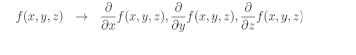

### The Partial Derivative of a Sum 

Calculating the partial derivative with respect to a given input means to calculate it like the regular derivative of one input, just while treating other inputs as constants. For example:

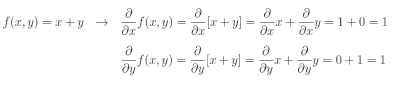

First, we applied the sum rule — the derivative of a sum is the sum of derivatives. Then, we already know that the derivative of ​x​ with respect to ​x​ equals ​1​. The new thing is the derivative of y​ with respect to ​x.​ As we mentioned, ​y​ is treated as a constant, as it does not change when we are deriving with respect to ​x​, and the derivative of a constant equals ​0​. In the second case, we derived with respect to ​y,​ thus treating ​x​ as constant. Put another way, regardless of the value of y in this example, the slope of ​x​ does not depend on ​y.​ This will not always be the case, though, as we will soon see. Let’s try another example:

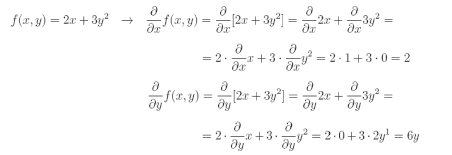

In this example, we also applied the sum rule first, then moved constants to the outside of the derivatives and calculated what remained with respect to ​x​ and ​y​ individually. The only difference to the non-multivariate derivatives from the previous chapter is the “partial” part, which means
we are deriving with respect to each of the variables separately. Other than that, there is nothing new here. Let’s try something seemingly more complicated:


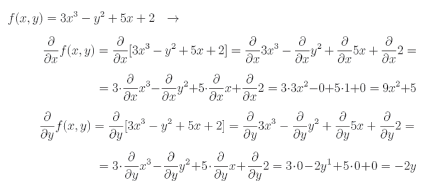

Pretty straight-forward — we’re constantly applying the same rules over and over again, and we did not add any new calculation or rules in this example.


### The Partial Derivative of Multiplication 

Before we move on, let’s introduce the partial derivative of multiplication operation:

We have already mentioned that we need to treat the other independent variables as constants, and we also have learned that we can move constants to the outside of the derivative. That’s exactly how we solve the calculation of the partial derivative of multiplication — we treat other variables as constants, like numbers, and move them outside of the derivative. It turns out that when we derive with respect to ​x,​ ​y​ is treated as a constant, and the result equals ​y​ multiplied by the derivative of ​x​ with respect to ​x,​ which is ​1.​ The whole derivative then results with ​y.​ The intuition behind this example is when calculating the partial derivative with respect to ​x,​ every change of ​x​ by ​1​ changes the function’s output by ​y​. For example, if ​y=3​ and ​x=1,​ the result is 1·3=3​. When we change ​x​ by ​1​ so ​y=3​ and ​x=2,​ the result is ​2·3=6.​ We changed ​x​ by ​1​ and the result changed by ​3​, by the ​y.​ That’s what the partial derivative of this function with respect to ​x tells us.


Let’s introduce a third input variable and add multiplication of variables for another example:
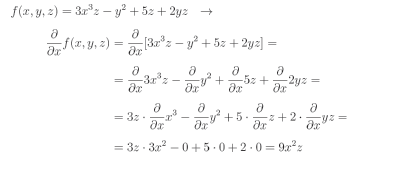
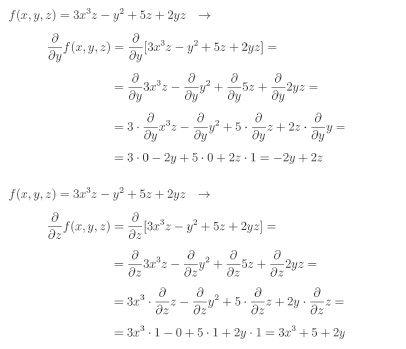
The only new operation here is, as mentioned, moving variables other than the one that we derive with respect to, outside of the derivative. The results in this example appear more complicated, but only because of the existence of other variables in them — variables that are treated as constants during derivation. Equations of the derivatives are longer, but not necessarily more complicated. The reason to learn about partial derivatives is we’ll be calculating the partial derivatives of multivariate functions soon, an example of which is the neuron. From the code perspective and the ​Dense​ layer class, more specifically, the ​forward​ method of this class, we’re passing in a single variable — the input array, containing either a batch of samples or outputs from the previous layer. From the math perspective, each value of this single variable (an array) is a separate input — it contains as many inputs as we have data in the input array. For example, if we pass a vector of ​4​ values to the neuron, it’s a singular variable in the code, but ​4​ separate inputs in the equation. This forms a function that takes multiple inputs. To learn about the impact that each input makes to the function’s output, we’ll need to calculate the partial derivative of this function with respect to each of its inputs, which we’ll explain in detail in the next chapter.

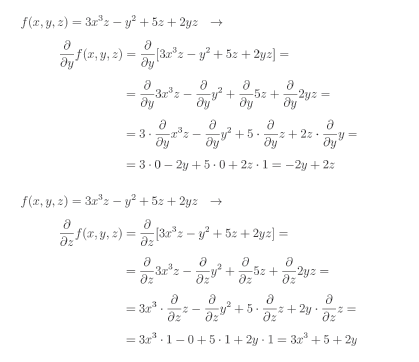

The only new operation here is, as mentioned, moving variables other than the one that we derive with respect to, outside of the derivative. The results in this example appear more complicated, but only because of the existence of other variables in them — variables that are treated as constants during derivation. Equations of the derivatives are longer, but not necessarily more complicated. The reason to learn about partial derivatives is we’ll be calculating the partial derivatives of multivariate functions soon, an example of which is the neuron. From the code perspective and the ​Dense​ layer class, more specifically, the ​forward​ method of this class, we’re passing in a single variable — the input array, containing either a batch of samples or outputs from the previous layer. From the math perspective, each value of this single variable (an array) is a separate input — it contains as many inputs as we have data in the input array. For example, if we pass a vector of ​4​ values to the neuron, it’s a singular variable in the code, but ​4​ separate inputs in the equation. This forms a function that takes multiple inputs. To learn about the impact that each input makes to the function’s output, we’ll need to calculate the partial derivative of this function with respect to each of its inputs, which we’ll explain in detail in the next chapter.


### The Partial Derivative of ​Max 

Derivatives and partial derivatives are not limited to addition and multiplication operations, or constants. We need to derive them for the other functions that we used in the forward pass, one of which is the derivative of the ​max()​ function:

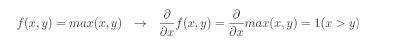

The max function returns the greatest input. We know that the derivative of ​x​ with respect to x equals ​1, s​ o the derivative of this function with respect to ​x​ equals 1 if ​x ​is greater than ​y,​ since the function will return ​x.​ In the other case, where ​y​ is greater than ​x​ and will get returned instead, the derivative of ​max()​ with respect to ​x​ equals 0 — we treat ​y​ as a constant, and the derivative of ​y with respect to ​x​ equals 0. We can denote that as ​1(x > y),​ which means ​1​ if the condition is met, and ​0​ otherwise. We could also calculate the partial derivative of ​max()​ with respect to ​y​, but we won’t need it anywhere in this book. One special case for the derivative of the ​max()​ function is when we have only one variable parameter, and the other parameter is always constant at ​0.​ This means that we want whichever is bigger in return — ​0​ or the input value, effectively clipping the input value at ​0​ from the positive side. Handling this is going to be useful when we calculate the derivative of the ​ReLU​ activation function since that activation function is defined as ​max(x, 0)​:

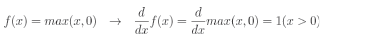

Notice that since this function takes a single parameter, we used the ​d​ operator instead of the ​∂ to calculate the non-partial derivative. In this case, the derivative is ​1​ when ​x​ is greater than ​0, otherwise, it’s ​0.​

### The Gradient 

As we mentioned at the beginning of this chapter, the gradient is a ​vector​ composed of all of the partial derivatives of a function, calculated with respect to each input variable. Let’s return to one of the partial derivatives of the sum operation that we calculated earlier:

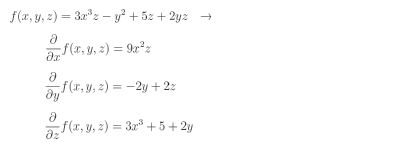

If we calculate all of the partial derivatives, we can form a gradient of the function. Using different notations, it looks as follows:

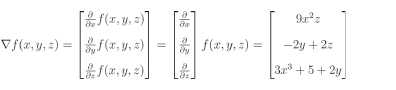

That’s all we have to know about the ​gradient​ - it’s a vector of all of the possible partial derivatives of the function, and we denote it using the ​∇​ — nabla symbol that looks like an inverted delta symbol. We’ll be using ​derivatives​ of single-parameter functions and ​gradients​ of multivariate functions to perform ​gradient descent​ using the ​chain rule, ​or, in other words, to perform the ​backward pass​, which is a part of the model training. How exactly we’ll do that is the subject of the next chapter.

### The Chain Rule 

During the forward pass, we’re passing the data through the neurons, then through the activation function, then through the neurons in the next layer, then through another activation function, and so on. We’re calling a function with an input parameter, taking an output, and using that output as an input to another function. For this simple example, let’s take 2 functions: ​f​ and ​g​:

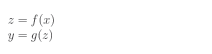

x is the input data, z is an output of the function f, but also an input for the function g, and y is an output of the function g. We could write the same calculation as:

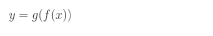

In this form, we do not use the intermediate z variable, showing that function g takes the output of function f directly as an input. This does not differ much from the above 2 equations but shows an important property of functions chained this way — since x is an input to the function f and then the output of the function f is an input to the function g, the output of the function g is influenced by x in some way, so there must exist a derivative which can inform us of this influence. The forward pass through our model is a chain of functions similar to these examples. We are passing in samples, the data flows through all of the layers, and activation functions to form an output. Let’s bring the equation and the code of the example model from chapter 1:


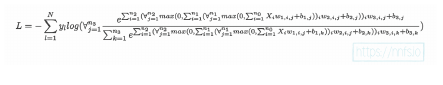
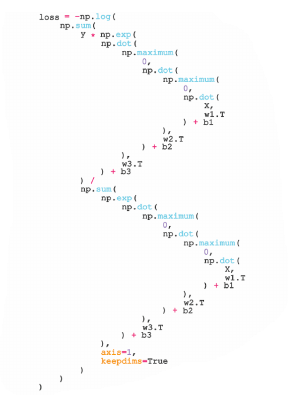

Figure 1:​ Code for a forward pass of an example neural network model.
If you look closely, you’ll see that we are presenting the loss as a big function, or a chain of functions, of multiple inputs — input data, weights, and biases. We are passing input data to the first layer where we also have that layer’s weights and biases, then the outputs flow through the ReLU activation function, and another layer, which brings more weights and biases, and another ReLU activation, up to the end — the output layer and softmax activation. The model output, along with the targets, is passed to the loss function, which returns the model’s error. We can look at the loss function not only as a function that takes the model’s output and targets as parameters to produce the error, but also as a function that takes targets, samples, and all of the weights and biases as inputs if we chain all of the functions performed during the forward pass as we’ve just shown in the images. To improve loss, we need to learn how each weight and bias impacts it. How to do that for a chain of functions? By using the chain rule. This rule says that the derivative of a function chain is a product of derivatives of all of the functions in this chain, for example:

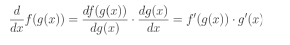


First, we wrote the derivative of the outer function, ​f(g(x)),​ with respect to the inner function, ​g(x),​ as this inner function is its parameter. Next, we multiplied it by the derivative of the inner function, ​g(x),​ with respect to its parameters, ​x​. We also denoted this derivative using 2 different notations. With 3 functions and multiple inputs, the partial derivative of this function with respect to ​x​ is as follows (we can’t use the prime notation in this case since we have to mention which variable we are deriving with respect to):

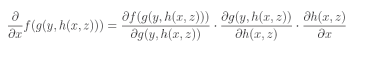

To calculate the partial derivative of a chain of functions with respect to some parameter, we take the partial derivative of the outer function with respect to the inner function in a chain to the parameter. Then multiply this partial derivative by the partial derivative of the inner function with respect to the more inner function in a chain to the parameter, then multiply this by the partial derivative of the more inner function with respect to the other function in the chain. We repeat this all the way down to the parameter in question. Notice, for example, how the middle derivative is with respect to ​h(x, z)​ and not ​y​ as ​h(x, z)​ is in the chain to the parameter ​x.​ The chain rule​ turns out to be the most important rule in finding the impact of singular input to the output of a chain of functions, which is the calculation of loss in our case. We’ll use it again in the next chapter when we discuss and code backpropagation. For now, let’s cover an example of the chain rule. Let’s solve the derivative of ​h(x) = 3(2x​2)​ 5​ ​. The first thing that we can notice here is that we have a complex function that can be split into two simpler functions. First is an equation part contained inside the parentheses, which we can write as ​g(x) = 2x​2.​ That’s the inside function that we exponentiate and multiply with the rest of the equation. The remaining part of the equation can then be written as ​f(y) = 3(y)​5.​ ​y​ in this case is what we denoted as ​g(x)=2x2​ ​ and when we combine it back, we get ​h(x) = f(g(x)) = 3(2x2​ ​)5​ ​ ​. To calculate a derivative of this function, we start by taking that outside exponent, the 5​​ , and place it in front of the component that we are exponentiating to multiply it later by the leading 3, giving us 15. We then subtract 1 from the 5​​ exponent, leaving us with a 4​​ .

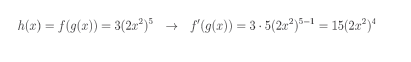
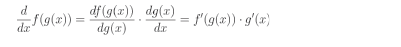

First, we wrote the derivative of the outer function, ​f(g(x)),​ with respect to the inner function, ​g(x),​ as this inner function is its parameter. Next, we multiplied it by the derivative of the inner function, ​g(x),​ with respect to its parameters, ​x​. We also denoted this derivative using 2 different notations. With 3 functions and multiple inputs, the partial derivative of this function with respect to ​x​ is as follows (we can’t use the prime notation in this case since we have to mention which variable we are deriving with respect to):

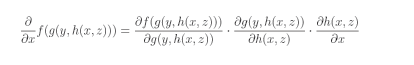

To calculate the partial derivative of a chain of functions with respect to some parameter, we take the partial derivative of the outer function with respect to the inner function in a chain to the parameter. Then multiply this partial derivative by the partial derivative of the inner function with respect to the more inner function in a chain to the parameter, then multiply this by the partial derivative of the more inner function with respect to the other function in the chain. We repeat this all the way down to the parameter in question. Notice, for example, how the middle derivative is with respect to ​h(x, z)​ and not ​y​ as ​h(x, z)​ is in the chain to the parameter ​x.​ The chain rule​ turns out to be the most important rule in finding the impact of singular input to the output of a chain of functions, which is the calculation of loss in our case. We’ll use it again in the next chapter when we discuss and code backpropagation. For now, let’s cover an example of the chain rule. Let’s solve the derivative of ​h(x) = 3(2x​2)​ 5​ ​. The first thing that we can notice here is that we have a complex function that can be split into two simpler functions. First is an equation part contained inside the parentheses, which we can write as ​g(x) = 2x​2.​ That’s the inside function that we exponentiate and multiply with the rest of the equation. The remaining part of the equation can then be written as ​f(y) = 3(y)​5.​ ​y​ in this case is what we denoted as ​g(x)=2x2​ ​ and when we combine it back, we get ​h(x) = f(g(x)) = 3(2x2​ ​)5​ ​ ​. To calculate a derivative of this function, we start by taking that outside exponent, the 5​​ , and place it in front of the component that we are exponentiating to multiply it later by the leading 3, giving us 15. We then subtract 1 from the 5​​ exponent, leaving us with a 4​​ .

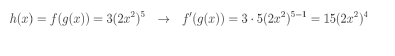

Then the chain rule informs us to multiply the above derivative of the outer function, with the derivative of the interior function, giving us:

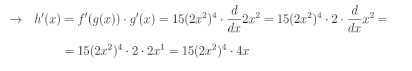

Recall that ​4x​ was the derivative of ​2x​2,​ which is the inner function, ​g(x).​ This highlights the chain rule​ concept in an example, allowing us to calculate the derivatives of more complex functions by chaining together the derivatives. Note that we multiplied by the derivative of that interior function, but left the interior function ​unchanged ​within the derivative of the outer function. In theory, we could just stop here with a perfectly-usable derivative of the function. We can enter some input into ​15(2x​2)​ 4​ ​ · 4x a​ nd get the answer. That said, we can also go ahead and simplify this function for more practice. Coming back to the original problem, so far we’ve found:

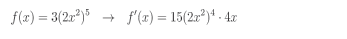
To simplify this derivative function, we first take ​(2x2​ ​)4​ ​ and distribute the 4​​ exponent:
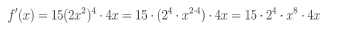

Combine the ​x’s​:

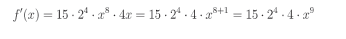

And the constants:
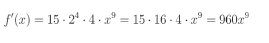

We’ll simplify derivatives later as well for faster computation — there’s no reason to repeat the same operations when we can solve them in advance. Hopefully, now you understand what derivatives and partial derivatives are, what the gradient is, what the derivative of the loss function with respect to weights and biases means, and how to use the chain rule. For now, these terms might sound disconnected, but we’re going to use them all to perform gradient descent in the backpropagation step, which is the subject of the next chapters.







Next Chapter ----> Backpropagation